In [154]:
# This notebook is linked to the AWSubduction_FraWSC-DHflx.ipynb one 
# It only makes the last part of scatter correlation plots 

In [155]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import scipy
import scipy.stats

%matplotlib inline

In [156]:
def pval_test(rpval,rtresh):
    # The p-value output by the scipy.stats.pearsonr function is to interpreted as follow:
    # It corresponds to the probability to make an error if we reject the H0 hypothesis (or null hypothesis)
    # This function just set a color to either green or red to set a correlation significance
    
    col_val='g' # green color stands for Ok, significative corelation
    if rpval > rtresh : col_val='r'  
    
    return col_val

In [157]:
s_year=1980 ; e_year=2015
#s_year=1960 ; e_year=1995

RYEAR=str(s_year)+'-'+str(e_year)

In [158]:
# List of GS± experiments names:
case_Ref='BVHNTMXD'   #; case_Ref='BVHNTMXP'  ;  case_Ref='BVHNTMXD'  ;  case_Ref='BCTGE27NTMX'  

ralpha=0.05 # Treshold I would like to repect, or confidence 5% 

SELSEC='XSec'   # Choose between XSec (Extreme North section) and NSec (Fram location)

if SELSEC == 'NSec': 
    nam_secfld='Ref_NS_FraWSC_Tmsk_mean'
else:
    nam_secfld='Ref_XS_FraWSC_Tmsk_mean'

In [159]:
ds_read=xr.Dataset()
ds_read=xr.open_dataset('./NETCDF/BOX-LargeFraWSC/'+case_Ref+'_y'+RYEAR+'_Full_LargeFraWSC_TiSe_Quant.nc')

In [160]:
ds_read

<xarray.Dataset>
Dimensions:                      (time: 432)
Coordinates:
  * time                         (time) datetime64[ns] 1980-01-31 ... 2015-12-31
Data variables:
    Ref_Qt_FraWSC_meanTiSe       (time) float64 ...
    Ref_AWTmax_FraWSC_meanTiSe   (time) float64 ...
    Ref_Icearea_FraWSC_meanTiSe  (time) float64 ...
    Ref_massflx_TiSe_nFraWSC     (time) float64 ...
    Ref_SS_FraWSC_Hflx_TiSe      (time) float64 ...
    Ref_NS_FraWSC_Hflx_TiSe      (time) float64 ...
    Ref_XS_FraWSC_Hflx_TiSe      (time) float64 ...
    Ref_SS_FraWSC_Vol_TiSe       (time) float64 ...
    Ref_NS_FraWSC_Vol_TiSe       (time) float64 ...
    Ref_XS_FraWSC_Vol_TiSe       (time) float64 ...
    Ref_FraWSC_S-N_Hflx_ano      (time) float64 ...
    Ref_FraWSC_S-X_Hflx_ano      (time) float64 ...

In [161]:
ds_read_add=xr.Dataset()
ds_read_add=xr.open_dataset('./NETCDF/BOX-LargeFraWSC/'+case_Ref+'_y'+RYEAR+'_TiSe_NetHeatQt_LargeFraWSC.nc')
ds_read['Ref_Qtdxdy_FraWSC_meanTiSe']=ds_read_add['Ref_Qtdxdy_FraWSC_meanTiSe']

In [162]:
# Read the mean temperature through the extreme north section computed for T >0°C
ds_read_add=xr.Dataset()
ds_read_add=xr.open_dataset('./NETCDF/BOX-LargeFraWSC/'+case_Ref+'_y'+RYEAR+'_LargeFraWSC_'+SELSEC+'_TMeanTiSe.nc')
ds_read[nam_secfld]=ds_read_add[nam_secfld]

In [163]:
ds_read

<xarray.Dataset>
Dimensions:                      (time: 432)
Coordinates:
  * time                         (time) datetime64[ns] 1980-01-31 ... 2015-12-31
Data variables:
    Ref_Qt_FraWSC_meanTiSe       (time) float64 ...
    Ref_AWTmax_FraWSC_meanTiSe   (time) float64 ...
    Ref_Icearea_FraWSC_meanTiSe  (time) float64 ...
    Ref_massflx_TiSe_nFraWSC     (time) float64 ...
    Ref_SS_FraWSC_Hflx_TiSe      (time) float64 ...
    Ref_NS_FraWSC_Hflx_TiSe      (time) float64 ...
    Ref_XS_FraWSC_Hflx_TiSe      (time) float64 ...
    Ref_SS_FraWSC_Vol_TiSe       (time) float64 ...
    Ref_NS_FraWSC_Vol_TiSe       (time) float64 ...
    Ref_XS_FraWSC_Vol_TiSe       (time) float64 ...
    Ref_FraWSC_S-N_Hflx_ano      (time) float64 ...
    Ref_FraWSC_S-X_Hflx_ano      (time) float64 ...
    Ref_Qtdxdy_FraWSC_meanTiSe   (time) float64 ...
    Ref_XS_FraWSC_Tmsk_mean      (time) float64 ...

In [164]:
DXSecTmean_QSurnet_Cor=np.corrcoef(ds_read[nam_secfld],ds_read['Ref_Qt_FraWSC_meanTiSe'])
DXSecTmean_AWTmax_Cor=np.corrcoef(ds_read[nam_secfld],ds_read['Ref_AWTmax_FraWSC_meanTiSe'])
DXSecTmean_IceArea_Cor=np.corrcoef(ds_read[nam_secfld],ds_read['Ref_Icearea_FraWSC_meanTiSe'])

# The follwing correlation computation is just another way to get correlation, but it gives also the p-value
DXSecTmean_QSurnet_CorSci=scipy.stats.pearsonr(ds_read[nam_secfld],ds_read['Ref_Qt_FraWSC_meanTiSe'])
DXSecTmean_AWTmax_CorSci=scipy.stats.pearsonr(ds_read[nam_secfld],ds_read['Ref_AWTmax_FraWSC_meanTiSe'])
DXSecTmean_IceArea_CorSci=scipy.stats.pearsonr(ds_read[nam_secfld],ds_read['Ref_Icearea_FraWSC_meanTiSe'])

print 'DXSecTmean_QSurnet_CorSci Corr | p-val:', np.round(DXSecTmean_QSurnet_CorSci[0],2),' | ', np.round(DXSecTmean_QSurnet_CorSci[1],4)
print 'DXSecTmean_AWTmax_CorSci Corr | p-val:', np.round(DXSecTmean_AWTmax_CorSci[0],2),' | ', np.round(DXSecTmean_AWTmax_CorSci[1],4)
print 'DXSecTmean_IceArea_CorSci Corr | p-val:', np.round(DXSecTmean_IceArea_CorSci[0],2),' | ', np.round(DXSecTmean_IceArea_CorSci[1],4)


DXSecTmean_QSurnet_CorSci Corr | p-val: -0.23  |  0.0
DXSecTmean_AWTmax_CorSci Corr | p-val: 0.01  |  0.9114
DXSecTmean_IceArea_CorSci Corr | p-val: -0.08  |  0.117


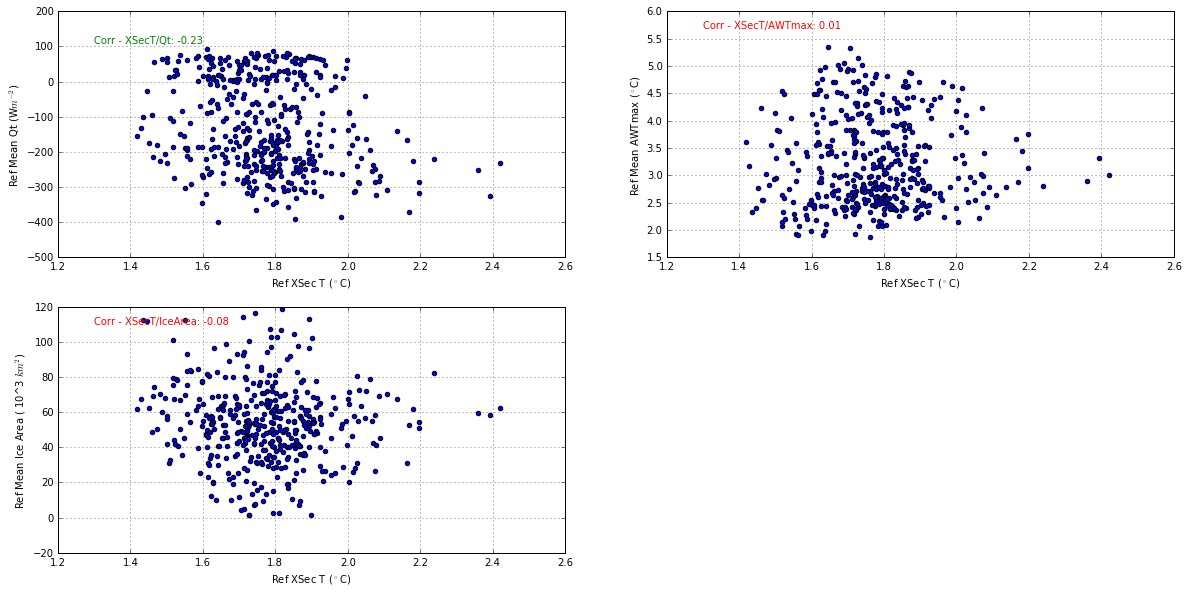

In [165]:
# Scatter plot between ∆Hflx and QSurnet
plt.figure(figsize=(20,15))

if case_Ref == 'BVHNTMXP' : 
    xtext=1.3
        
if case_Ref == 'BVHNTMXD' : 
    xtext=1.3

if case_Ref == 'BCTGE27NTMX' : 
    xtext=1.3
        
# Scatter plot between XSecT and Qt
plt.subplot(321) 
plt.scatter(ds_read[nam_secfld],ds_read['Ref_Qt_FraWSC_meanTiSe'])
plt.xlabel(r'Ref '+SELSEC+' T ($^\circ$C)')
plt.ylabel(r'Ref Mean Qt (W$m^{-2}$)')
plt.ylim([-500., 200.])
plt.text(xtext,110.,r'Corr - '+SELSEC+'T/Qt: '+str(np.round(DXSecTmean_QSurnet_Cor[1][0],2)),color=pval_test(DXSecTmean_QSurnet_CorSci[1],ralpha))
plt.grid(True)

# Scatter plot between XSecT and AWTmax
plt.subplot(322) 
plt.scatter(ds_read[nam_secfld],ds_read['Ref_AWTmax_FraWSC_meanTiSe'])
plt.xlabel(r'Ref '+SELSEC+' T ($^\circ$C)')
plt.ylabel(r'Ref Mean AWTmax ($^\circ$C)')
plt.ylim([1.5, 6.])

if case_Ref == 'BVHNTMXP' :     ytext=5.25
if case_Ref == 'BVHNTMXD' :     ytext=5.7
if case_Ref == 'BCTGE27NTMX' :     ytext=5.25
plt.text(xtext,ytext,r'Corr - '+SELSEC+'T/AWTmax: '+str(np.round(DXSecTmean_AWTmax_Cor[1][0],2)),color=pval_test(DXSecTmean_AWTmax_CorSci[1],ralpha))
plt.grid(True)

# Scatter plot between XSecT and IceArea
plt.subplot(323) 
plt.scatter(ds_read[nam_secfld],ds_read['Ref_Icearea_FraWSC_meanTiSe'])
plt.xlabel(r'Ref '+SELSEC+' T ($^\circ$C)')
plt.ylabel(r'Ref Mean Ice Area ( 10^3 $km^{2}$)')
plt.ylim([-20., 120.])

if case_Ref == 'BVHNTMXD' :     ytext=110.
if case_Ref == 'BVHNTMXP' :     ytext=110.
if case_Ref == 'BCTGE27NTMX' :     ytext=110.
plt.text(xtext,ytext,r'Corr - '+SELSEC+'T/IceArea: '+str(np.round(DXSecTmean_IceArea_Cor[1][0],2)),color=pval_test(DXSecTmean_IceArea_CorSci[1],ralpha))
plt.grid(True)
    


dosave=True
if dosave: plt.savefig('./FIGURES/'+case_Ref+'_y'+RYEAR+'_ScatPlot_LargeFraWSC_NOSmooth_'+SELSEC+'T_vs_Qt_IceArea_AWTmax.pdf')
dosave=False

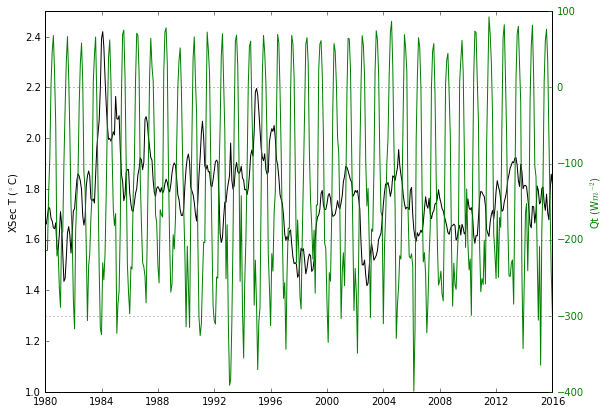

In [166]:

plt.figure(figsize=(20,15))

ax=plt.subplot(223) ; ax2=plt.twinx()
ax.plot(ds_read['time'],ds_read[nam_secfld],'k')
ax.set_ylabel(SELSEC+r' T ($^\circ$C)')
ax.set_ylim([1.,2.5])
ax.set_xlim(str(s_year),str(e_year+1))
plt.grid(True)

col2,=ax2.plot(ds_read['time'],ds_read['Ref_Qt_FraWSC_meanTiSe'],'g')
ax2.set_ylim([-400.,100.])
ax2.set_ylabel(r'Qt (W$m^{-2}$)')

ax2.yaxis.label.set_color(col2.get_color())
ax2.tick_params(axis='y', colors=col2.get_color())


## Smoothing step of time-series

########
CAUTION
########
In smoothing the signal with a 12 months window, we remove all hihger frequencies below 12 months.  
The results is that each resulting point is a mixture of 6 points after and before. 
Finaly if we compute lag correlations, they will be quite high over almost all lags in the range [-6 6] months BUT without usefull meaning   

In [167]:
# Apply a 12 months smoothing of monthly data

# First transform the dataset into a Pandas dataframe
data_read=ds_read.to_dataframe()
#data_read
# Apply the rolling mean over 12 months
data_rolmean=data_read.rolling(12,center=True).mean()


In [168]:
data_rolmean

,Ref_Qt_FraWSC_meanTiSe,Ref_AWTmax_FraWSC_meanTiSe,Ref_Icearea_FraWSC_meanTiSe,Ref_massflx_TiSe_nFraWSC,Ref_SS_FraWSC_Hflx_TiSe,Ref_NS_FraWSC_Hflx_TiSe,Ref_XS_FraWSC_Hflx_TiSe,Ref_SS_FraWSC_Vol_TiSe,Ref_NS_FraWSC_Vol_TiSe,Ref_XS_FraWSC_Vol_TiSe,Ref_FraWSC_S-N_Hflx_ano,Ref_FraWSC_S-X_Hflx_ano,Ref_Qtdxdy_FraWSC_meanTiSe,Ref_XS_FraWSC_Tmsk_mean
time,,,,,,,,,,,,,,
1980-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-07-31,-105.236559,2.839181,73.115885,-2.527162e+07,60.001837,16.362574,16.053807,5.078559,1.842468,1.924598,43.639264,43.948030,-2.049306e+13,1.654856
1980-08-31,-111.458708,2.814406,74.164980,-2.779004e+07,59.386518,15.139582,15.998704,5.084940,1.748554,1.931601,44.246936,43.387814,-2.170472e+13,1.658892
1980-09-30,-109.554043,2.794963,74.661758,-2.792396e+07,61.998187,14.859540,16.721080,5.261542,1.764512,2.040091,47.138647,45.277107,-2.133382e+13,1.656354


In [169]:
ds_read

<xarray.Dataset>
Dimensions:                      (time: 432)
Coordinates:
  * time                         (time) datetime64[ns] 1980-01-31 ... 2015-12-31
Data variables:
    Ref_Qt_FraWSC_meanTiSe       (time) float64 -214.3 -214.0 ... -243.1 -299.1
    Ref_AWTmax_FraWSC_meanTiSe   (time) float64 2.717 2.543 ... 3.703 3.205
    Ref_Icearea_FraWSC_meanTiSe  (time) float64 79.77 92.87 ... 43.99 37.07
    Ref_massflx_TiSe_nFraWSC     (time) float64 -2.582e+07 ... -1.549e+07
    Ref_SS_FraWSC_Hflx_TiSe      (time) float64 77.21 59.59 ... 129.1 144.8
    Ref_NS_FraWSC_Hflx_TiSe      (time) float64 31.53 22.58 ... 18.87 34.06
    Ref_XS_FraWSC_Hflx_TiSe      (time) float64 22.79 15.7 18.86 ... 11.26 20.44
    Ref_SS_FraWSC_Vol_TiSe       (time) float64 6.306 5.325 ... 8.596 9.912
    Ref_NS_FraWSC_Vol_TiSe       (time) float64 3.338 2.494 ... 0.9315 2.486
    Ref_XS_FraWSC_Vol_TiSe       (time) float64 2.537 1.706 ... 0.6395 1.583
    Ref_FraWSC_S-N_Hflx_ano      (time) float64 45.68 37.01

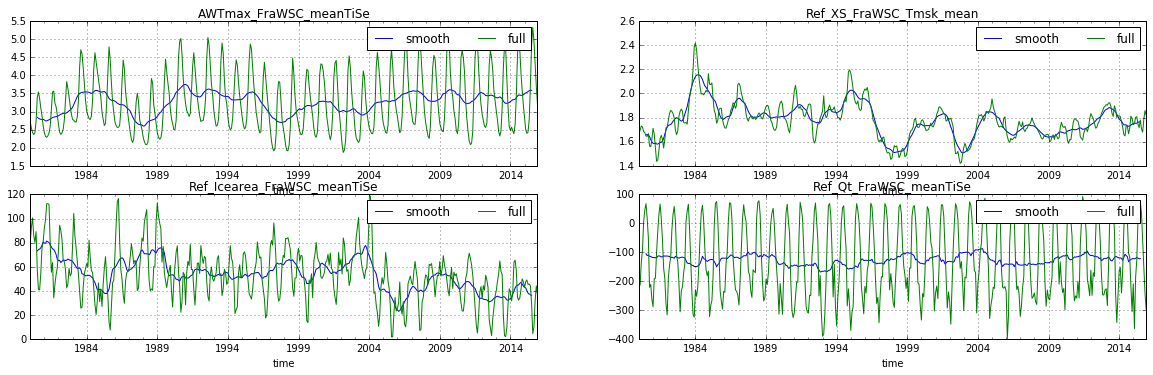

In [170]:
plt.figure(figsize=(20,15))

plt.subplot(521)
data_rolmean['Ref_AWTmax_FraWSC_meanTiSe'].plot(label='smooth')
data_read['Ref_AWTmax_FraWSC_meanTiSe'].plot(color='g',label='full')
plt.title('AWTmax_FraWSC_meanTiSe')
plt.legend(ncol=2)
plt.grid(True)

plt.subplot(522)
data_rolmean[nam_secfld].plot(label='smooth')
data_read[nam_secfld].plot(color='g',label='full')
plt.title(nam_secfld)
plt.legend(ncol=2)
plt.grid(True)

plt.subplot(523)
data_rolmean['Ref_Icearea_FraWSC_meanTiSe'].plot(label='smooth')
data_read['Ref_Icearea_FraWSC_meanTiSe'].plot(color='g',label='full')
plt.title('Ref_Icearea_FraWSC_meanTiSe')
plt.legend(ncol=2)
plt.grid(True)

plt.subplot(524)
data_rolmean['Ref_Qt_FraWSC_meanTiSe'].plot(label='smooth')
data_read['Ref_Qt_FraWSC_meanTiSe'].plot(color='g',label='full')
plt.title('Ref_Qt_FraWSC_meanTiSe')
plt.legend(ncol=2)
plt.grid(True)


dosave=True
if dosave: plt.savefig('./FIGURES/'+case_Ref+'_y'+RYEAR+'_TiSe_LargeFraWSC_NOSmooth_'+SELSEC+'T_vs_Qt_IceArea_AWTmax.pdf')
dosave=False


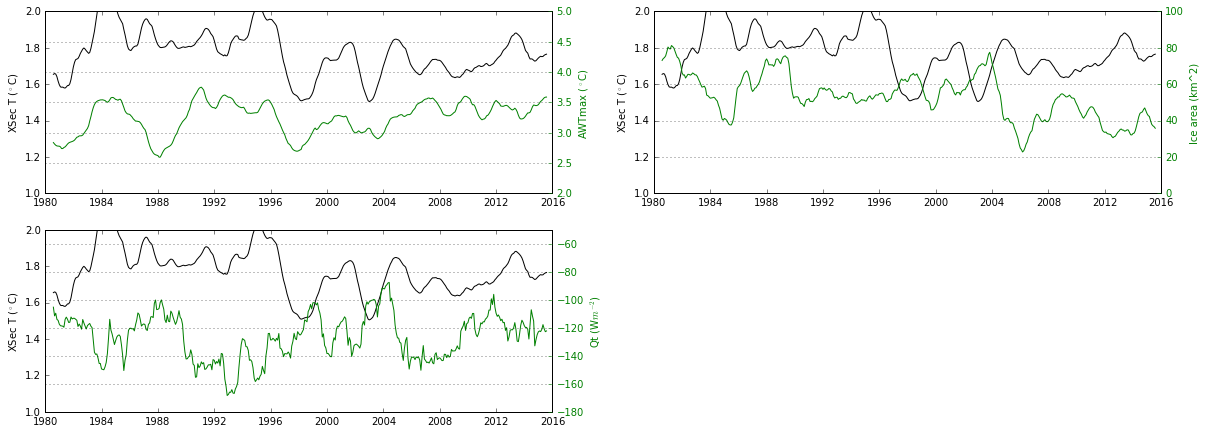

In [171]:
plt.figure(figsize=(20,15))


if SELSEC == 'NSec':
    yrange=[1.,3.]
else:
    yrange=[1.,2.]
    
ax=plt.subplot(421) ; ax2=plt.twinx()
ax.plot(ds_read['time'],data_rolmean[nam_secfld],'k')
ax.set_ylabel(SELSEC+r' T ($^\circ$C)')
ax.set_ylim(yrange)
ax.set_xlim(str(s_year),str(e_year+1))
plt.grid(True)

col2,=ax2.plot(ds_read['time'],data_rolmean['Ref_AWTmax_FraWSC_meanTiSe'],'g')
ax2.set_ylim([2.,5.])
ax2.set_ylabel(r'AWTmax ($^\circ$C)')

ax2.yaxis.label.set_color(col2.get_color())
ax2.tick_params(axis='y', colors=col2.get_color())
plt.grid(True)

ax=plt.subplot(422) ; ax2=plt.twinx()
ax.plot(ds_read['time'],data_rolmean[nam_secfld],'k')
ax.set_ylabel(SELSEC+r' T ($^\circ$C)')
ax.set_ylim(yrange)
ax.set_xlim(str(s_year),str(e_year+1))
plt.grid(True)

col2,=ax2.plot(ds_read['time'],data_rolmean['Ref_Icearea_FraWSC_meanTiSe'],'g')
ax2.set_ylim([0.,100.])
ax2.set_ylabel(r'Ice area (km^2)')

ax2.yaxis.label.set_color(col2.get_color())
ax2.tick_params(axis='y', colors=col2.get_color())

ax=plt.subplot(423) ; ax2=plt.twinx()
ax.plot(ds_read['time'],data_rolmean[nam_secfld],'k')
ax.set_ylabel(SELSEC+r' T ($^\circ$C)')
ax.set_ylim(yrange)
ax.set_xlim(str(s_year),str(e_year+1))
plt.grid(True)

col2,=ax2.plot(ds_read['time'],data_rolmean['Ref_Qt_FraWSC_meanTiSe'],'g')
ax2.set_ylim([-180.,-50.])
ax2.set_ylabel(r'Qt (W$m^{-2}$)')

ax2.yaxis.label.set_color(col2.get_color())
ax2.tick_params(axis='y', colors=col2.get_color())


dosave=True
if dosave: plt.savefig('./FIGURES/'+case_Ref+'_y'+RYEAR+'_TiSe_LargeFraWSC_12mSmooth_'+SELSEC+'T_vs_Qt_IceArea_AWTmax.pdf')
dosave=False

In [172]:
# Compute the correlation on the same overlap period
NXSecTmean_QSurnet_Cor=np.corrcoef(data_rolmean[nam_secfld][6:-5],data_rolmean['Ref_Qt_FraWSC_meanTiSe'][6:-5])
NXSecTmean_IceArea_Cor=np.corrcoef(data_rolmean[nam_secfld][6:-5],data_rolmean['Ref_Icearea_FraWSC_meanTiSe'][6:-5])
NXSecTmean_AWTmax_Cor=np.corrcoef(data_rolmean[nam_secfld][6:-5],data_rolmean['Ref_AWTmax_FraWSC_meanTiSe'][6:-5])

# Re-Compute the correlation on the same overlap period
# The follwing correlation computation is just an other way to get correlation, but it gives also the p-value
NXSecTmean_QSurnet_CorSci=scipy.stats.pearsonr(data_rolmean[nam_secfld][6:-5],data_rolmean['Ref_Qt_FraWSC_meanTiSe'][6:-5])
NXSecTmean_IceArea_CorSci=scipy.stats.pearsonr(data_rolmean[nam_secfld][6:-5],data_rolmean['Ref_Icearea_FraWSC_meanTiSe'][6:-5])
NXSecTmean_AWTmax_CorSci=scipy.stats.pearsonr(data_rolmean[nam_secfld][6:-5],data_rolmean['Ref_AWTmax_FraWSC_meanTiSe'][6:-5])

print 'NDHflx_QSurnet_CorSci Corr | p-val:', np.round(NXSecTmean_QSurnet_CorSci[0],2),' | ', np.round(NXSecTmean_QSurnet_Cor[1],4)
print 'NDHflx_IceArea_CorSci Corr | p-val:', np.round(NXSecTmean_IceArea_CorSci[0],2),' | ', np.round(NXSecTmean_IceArea_CorSci[1],4)
print 'NDHflx_AWTmax_CorSci  Corr | p-val:', np.round(NXSecTmean_AWTmax_CorSci[0],2) ,' | ', np.round(NXSecTmean_AWTmax_CorSci[1],4)


NDHflx_QSurnet_CorSci Corr | p-val: -0.35  |  [-0.351  1.   ]
NDHflx_IceArea_CorSci Corr | p-val: -0.22  |  0.0
NDHflx_AWTmax_CorSci  Corr | p-val: 0.42  |  0.0


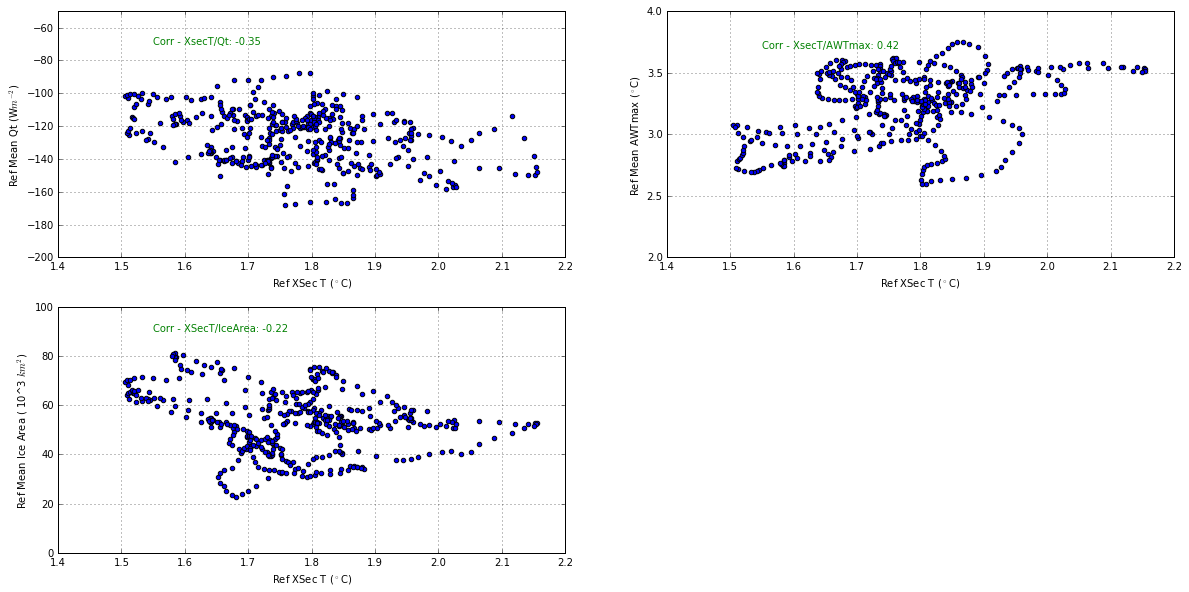

In [173]:
# Scatter plot between ∆Hflx and QSurnet
plt.figure(figsize=(20,15))

if case_Ref == 'BVHNTMXP' :     xtext=1.55
if case_Ref == 'BVHNTMXD' :     xtext=1.55
if case_Ref == 'BCTGE27NTMX' :     xtext=1.35
      
# Scatter plot between XSecT and Qt
plt.subplot(321) 
plt.scatter(data_rolmean[nam_secfld],data_rolmean['Ref_Qt_FraWSC_meanTiSe'])
plt.xlabel(r'Ref '+SELSEC+r' T ($^\circ$C)')
plt.ylabel(r'Ref Mean Qt (W$m^{-2}$)')
plt.ylim([-200., -50.])
plt.text(xtext,-70.,r'Corr - XsecT/Qt: '+str(np.round(NXSecTmean_QSurnet_Cor[1][0],2)),color=pval_test(NXSecTmean_QSurnet_CorSci[1],ralpha))
plt.grid(True)

# Scatter plot between XSecT and AWTmax
plt.subplot(322) 
plt.scatter(data_rolmean[nam_secfld],data_rolmean['Ref_AWTmax_FraWSC_meanTiSe'])
plt.xlabel(r'Ref '+SELSEC+r' T ($^\circ$C)')
plt.ylabel(r'Ref Mean AWTmax ($^\circ$C)')
plt.ylim([2., 4.])

if case_Ref == 'BVHNTMXP' :     ytext=3.7
if case_Ref == 'BVHNTMXD' :     ytext=3.7
if case_Ref == 'BCTGE27NTMX' :     ytext=3.7
plt.text(xtext,ytext,r'Corr - XsecT/AWTmax: '+str(np.round(NXSecTmean_AWTmax_Cor[1][0],2)),color=pval_test(NXSecTmean_AWTmax_CorSci[1],ralpha))
plt.grid(True)

# Scatter plot between XSecT and IceArea
plt.subplot(323) 
plt.scatter(data_rolmean[nam_secfld],data_rolmean['Ref_Icearea_FraWSC_meanTiSe'])
plt.xlabel(r'Ref '+SELSEC+r' T ($^\circ$C)')
plt.ylabel(r'Ref Mean Ice Area ( 10^3 $km^{2}$)')
plt.ylim([0., 100.])

if case_Ref == 'BVHNTMXD' :     ytext=130.
if case_Ref == 'BVHNTMXP' :     ytext=110.
if case_Ref == 'BCTGE27NTMX' :     ytext=110.
plt.text(xtext,90.,r'Corr - '+SELSEC+'T/IceArea: '+str(np.round(NXSecTmean_IceArea_Cor[1][0],2)),color=pval_test(NXSecTmean_IceArea_CorSci[1],ralpha))
plt.grid(True)
    

dosave=True
if dosave: plt.savefig('./FIGURES/'+case_Ref+'_y'+RYEAR+'_Lag0Corr_LargeFraWSC_12mSmooth_'+SELSEC+'T_vs_Qt_IceArea_AWTmax.pdf')
dosave=False